In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student_academic_performance.csv')

**Viewing the data**

In [3]:
df.head()

,age,gender,study_hours,attendance_percentage,parent_education,subject,exam_score,performance_level
0,22,Male,6,81,High School,English,31,Poor
1,19,Male,4,73,Bachelor,Math,56,Average
2,23,Female,3,72,High School,Math,65,Good
3,20,Male,7,81,Master,Science,65,Good
4,22,Male,7,86,Master,English,55,Average


* **Q1 ▶ Dataset me total rows & columns kitne hain?**

In [4]:
df.shape

(200, 8)

* **Answer 1** ▶ **Rows - 200** & **Columns - 8**

* **Q2 ▶ Kaunse columns numeric aur kaunse categorical hain?**

In [5]:
#print("Numeric Columns:", df.select_dtypes(include=['number']).columns.tolist())
#print("Categorical Columns:", df.select_dtypes(include=['object']).columns.tolist())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    200 non-null    int64 
 1   gender                 200 non-null    object
 2   study_hours            200 non-null    int64 
 3   attendance_percentage  200 non-null    int64 
 4   parent_education       200 non-null    object
 5   subject                200 non-null    object
 6   exam_score             200 non-null    int64 
 7   performance_level      200 non-null    object
dtypes: int64(4), object(4)
memory usage: 12.6+ KB


  * **Answer 2** ▶
    
        Numeric Columns -
                            >"age"
                            >"study_hours"
                            >"attendance_percentage"
                            >"exam_score"
               &        
        Categorical Columns -
                            >"gender"
                            >"parent_education"
                            >"subject"
                            >"performace"

* **Q3 ▶ exam_score ka mean, min, max kya hai?**

In [7]:
df.describe()


,age,study_hours,attendance_percentage,exam_score
count,200.00000,200.000000,200.000000,200.000000
mean,20.07000,3.955000,74.725000,63.680000
std,2.63435,1.952443,14.161643,19.765398
min,16.00000,1.000000,50.000000,30.000000
25%,18.00000,2.000000,62.000000,48.000000
50%,20.00000,4.000000,74.000000,64.000000
75%,22.00000,5.250000,86.250000,80.000000
max,24.00000,7.000000,99.000000,99.000000


* **Answer 3** ▶ **''Mean,Min,Max'' of exam_score column**         
# exam_score
      * Min  ▶ 30.00
      * Mean ▶ 63.68     
      * Max  ▶ 99.00

* **Q4 ▶ study_hours ka average kitna hai?**

In [8]:
df['study_hours'].mean()

np.float64(3.955)

* **Answer 4 ▶ Average of study_hours ➖ 3.955**

* **Q5 ▶ Kaunsa performance_level sabse zyada common hai?**

In [9]:
df['performance_level'].value_counts()

,count
performance_level,
Good,58
Average,56
Excellent,55
Poor,31


* **Answer 5 ▶ Common performance_level is Good**

* **Q6 ▶ Subject-wise average exam_score kya hai?**

In [10]:
df.groupby('subject')['exam_score'].mean()

,exam_score
subject,
English,64.257576
Math,64.134328
Science,62.656716


* **Answer 6 ▶ Average exam_score by subject is as followed -**
    
        * English ▶ 64.25
        * Math ▶ 64.13
        * Science ▶ 62.65

* **Q7 ▶ Kya study_hours badhne se exam_score improve hota hai?**

In [11]:
df[['study_hours', 'exam_score']].corr()

,study_hours,exam_score
study_hours,1.000000,-0.018866
exam_score,-0.018866,1.000000


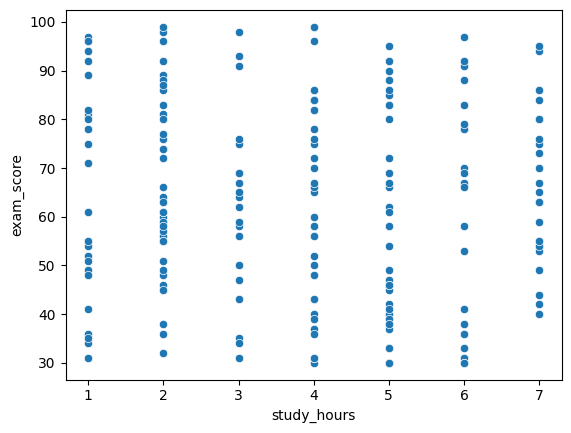

In [12]:
sns.scatterplot(x='study_hours', y='exam_score', data=df)
plt.show()

* **Answer 7 ▶ As we can see there is (- ve) relation between study_hours and exam_score and confirmed by visualization that studuents increasing study_hours are getting low marks**

* **Q8 ▶ Attendance aur exam_score ka relation kya hai?**

In [13]:
df[['attendance_percentage','exam_score']].corr()

,attendance_percentage,exam_score
attendance_percentage,1.000000,0.098675
exam_score,0.098675,1.000000


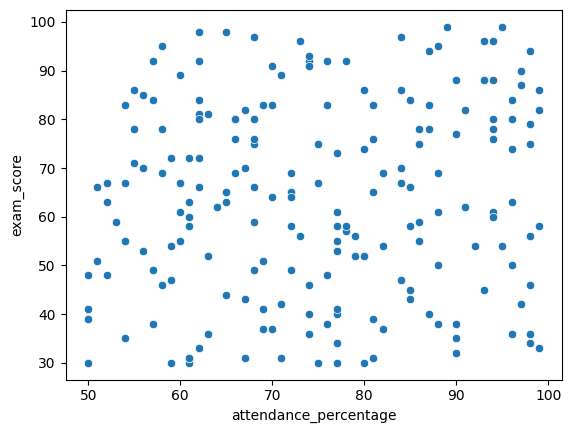

In [14]:
sns.scatterplot(x='attendance_percentage', y='exam_score', data=df)
plt.show()

In [15]:
df['attendance_percentage'].corr(df['exam_score'])

np.float64(0.09867475278362542)

* **Answer 8 ▶ There is no strong relation between 'attendance_percentage' and 'exam_score'**

* **Q9 ▶ Gender ke hisaab se performance me difference hai ya nahi?**

In [16]:
df.groupby('gender')['exam_score'].mean()

,exam_score
gender,
Female,64.579439
Male,62.645161


<Axes: xlabel='gender', ylabel='exam_score'>

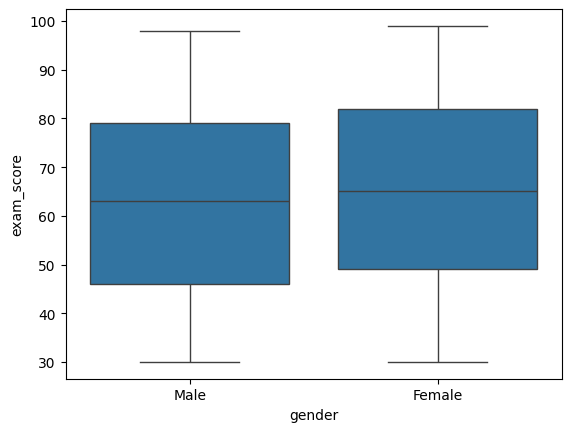

In [17]:
sns.boxplot(x='gender', y='exam_score', data=df)

* **Answer 9 ▶ As we can see that the average (mean) of Gender is +≈ 2 but in visualization we didn't noticed much difference in both gender's performance_level it means this is because of some random variability**

* **Q10 ▶ Parent education ka student performance pe kya effect hai?**

In [18]:
df.groupby('parent_education')['exam_score'].mean()

,exam_score
parent_education,
Bachelor,66.376812
High School,63.348485
Master,61.153846


* **Answer 10 ▶ This show's that exam_score is more when education level of parent is BACHELOR's later on followed by High School and Masters at last**

* **Q11 ▶ exam_score ka distribution dikhao (histplot)**

* **Answer 11 ▶ ⤵**

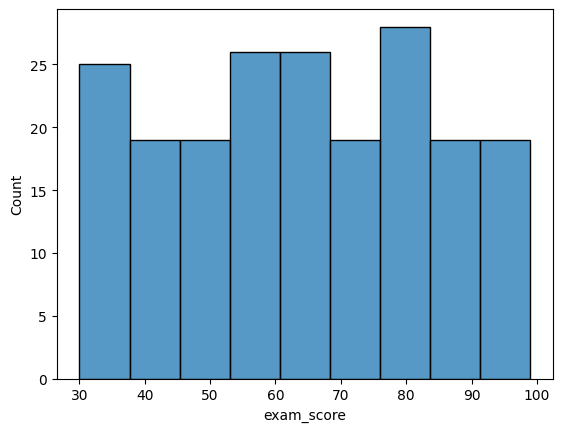

In [19]:
sns.histplot(df['exam_score'])
plt.show()

* **Q12 ▶ study_hours vs exam_score ka scatterplot banao**

* **Answer 12 ▶ ⤵**

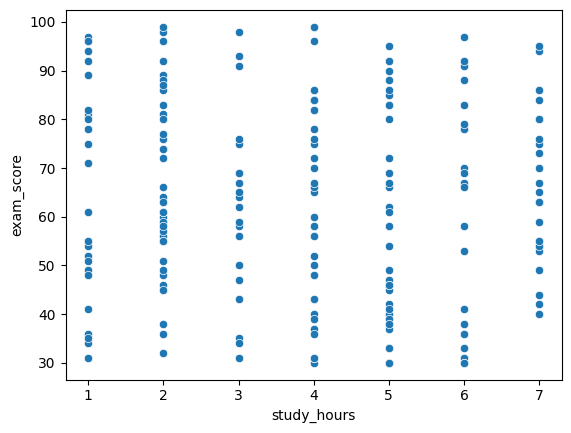

In [20]:
sns.scatterplot(x='study_hours', y='exam_score', data=df)
plt.show()

* **Q13 ▶ subject vs exam_score ka barplot banao**

* **Answer 13 ▶ ⤵**

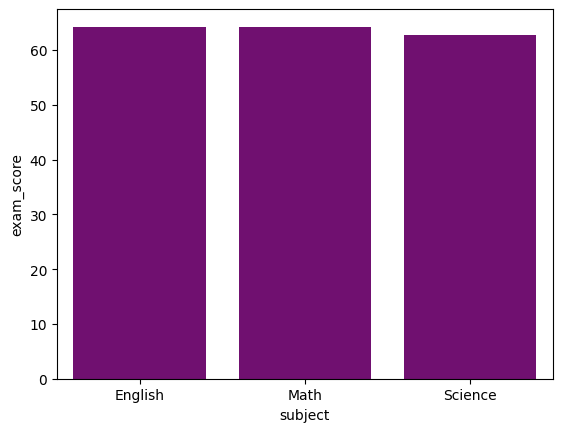

In [21]:
sns.barplot(x='subject', y='exam_score', data=df,errorbar=None, color= 'purple')
plt.show()

* **Q14 ▶ performance_level ka countplot banao**

* **Answer 14 ▶ ⤵**

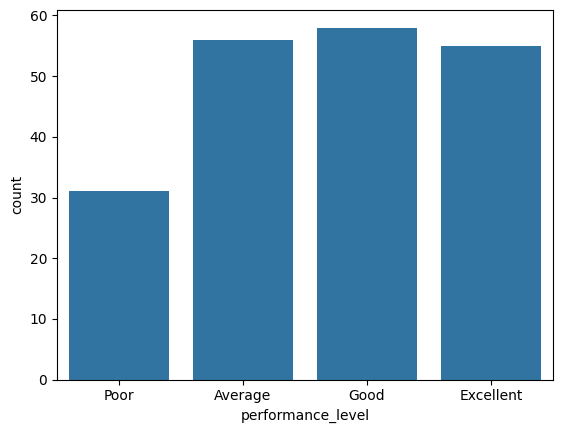

In [22]:
sns.countplot(x='performance_level', data=df)
plt.show()

* **Q15 ▶ Attendance vs exam_score ka boxplot banao**

* **Answer 15 ▶ ⤵**

In [23]:
bins = [0, 60, 70, 80, 90, 100]
labels = ['<60', '60-70', '70-80', '80-90', '90-100']

df['attendance_bin'] = pd.cut(df['attendance_percentage'], bins=bins, labels=labels, include_lowest=True)

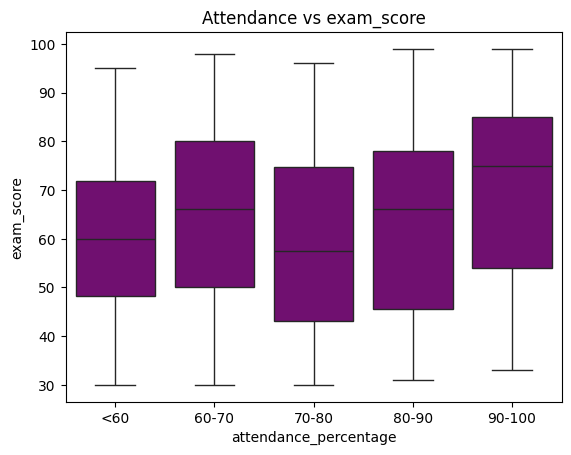

In [24]:
sns.boxplot(x=df['attendance_bin'], y=df['exam_score'], color='purple')
plt.title('Attendance vs exam_score')
plt.xlabel('attendance_percentage')
plt.ylabel('exam_score')
plt.show()

* **Q16 ▶ Numeric features ka correlation heatmap banao**

* **Answer 16 ▶ ⤵**

In [25]:
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_features)
corr_matrix = df[numeric_features].corr()

['age', 'study_hours', 'attendance_percentage', 'exam_score']


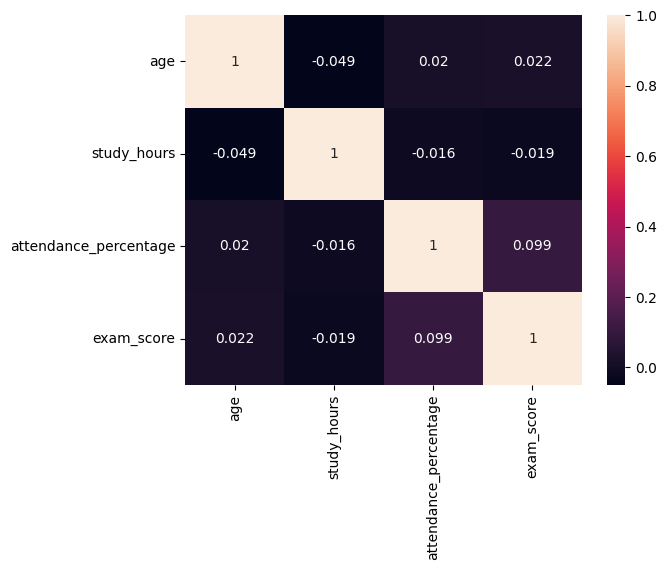

In [26]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

* **Q17 ▶ exam_score se Pass/Fail column banao**

* **Answer 17 ▶ ⤵**

In [27]:
df['Pass/Fail'] = df['exam_score'].apply(lambda x: 'Pass' if x >=63 else 'Fail')

In [28]:
df.head()

,age,gender,study_hours,attendance_percentage,parent_education,subject,exam_score,performance_level,attendance_bin,Pass/Fail
0,22,Male,6,81,High School,English,31,Poor,80-90,Fail
1,19,Male,4,73,Bachelor,Math,56,Average,70-80,Fail
2,23,Female,3,72,High School,Math,65,Good,70-80,Pass
3,20,Male,7,81,Master,Science,65,Good,80-90,Pass
4,22,Male,7,86,Master,English,55,Average,80-90,Fail


* **Q18 ▶study_hours ke basis par Low/Medium/High Study category banao**

* **Answer 18 ▶ ⤵**

In [29]:
df['study_hours'].describe()

,study_hours
count,200.000000
mean,3.955000
std,1.952443
min,1.000000
25%,2.000000
50%,4.000000
75%,5.250000
max,7.000000


In [30]:
df['Study_category'] = pd.cut(df['study_hours'], bins= [0 , 3, 5, 7], labels = ['Low','Medium','High'])

In [31]:
df.head()

,age,gender,study_hours,attendance_percentage,parent_education,subject,exam_score,performance_level,attendance_bin,Pass/Fail,Study_category
0,22,Male,6,81,High School,English,31,Poor,80-90,Fail,High
1,19,Male,4,73,Bachelor,Math,56,Average,70-80,Fail,Medium
2,23,Female,3,72,High School,Math,65,Good,70-80,Pass,Low
3,20,Male,7,81,Master,Science,65,Good,80-90,Pass,High
4,22,Male,7,86,Master,English,55,Average,80-90,Fail,High


* **Q19 ▶Attendance aur study_hours ka combined feature banao**

* **Answer 19 ▶ ⤵**

In [32]:
df['Attendace+study_hours'] = df['attendance_percentage'] + df['study_hours']

In [33]:
df.head()

,age,gender,study_hours,attendance_percentage,parent_education,subject,exam_score,performance_level,attendance_bin,Pass/Fail,Study_category,Attendace+study_hours
0,22,Male,6,81,High School,English,31,Poor,80-90,Fail,High,87
1,19,Male,4,73,Bachelor,Math,56,Average,70-80,Fail,Medium,77
2,23,Female,3,72,High School,Math,65,Good,70-80,Pass,Low,75
3,20,Male,7,81,Master,Science,65,Good,80-90,Pass,High,88
4,22,Male,7,86,Master,English,55,Average,80-90,Fail,High,93


* **Q20 ▶Age group banao (Teen / Adult)**

* **Answer 20 ▶ ⤵**

In [34]:
df['Age_group'] = df['age'].apply(lambda x : 'Teen' if x < 18 else 'Adult')

In [35]:
df.head()

,age,gender,study_hours,attendance_percentage,parent_education,subject,exam_score,performance_level,attendance_bin,Pass/Fail,Study_category,Attendace+study_hours,Age_group
0,22,Male,6,81,High School,English,31,Poor,80-90,Fail,High,87,Adult
1,19,Male,4,73,Bachelor,Math,56,Average,70-80,Fail,Medium,77,Adult
2,23,Female,3,72,High School,Math,65,Good,70-80,Pass,Low,75,Adult
3,20,Male,7,81,Master,Science,65,Good,80-90,Pass,High,88,Adult
4,22,Male,7,86,Master,English,55,Average,80-90,Fail,High,93,Adult


* **Q21 ▶Kaunse factors student performance improve karte hain?**

* **Answer 21 ▶ _parent_education_ strongly correlates with student performance, where students with parents having a Bachelor's degree perform better**

* **Q22 ▶Kis subject me students ko extra support chahiye?**

* **Answer 22 ▶ Earlier we see that average exam_score of students in _Science_ subject is low so need to focus more on the _Science_ subject**

* **Q23 ▶Kya low attendance wale students ka score consistently kam hai?**

In [36]:
df.groupby('attendance_bin',observed = False)['exam_score'].mean()

,exam_score
attendance_bin,
<60,61.184211
60-70,64.617021
70-80,60.547619
80-90,63.868421
90-100,68.685714


In [37]:
df.groupby('attendance_bin',observed = True)['exam_score'].describe()

,count,mean,std,min,25%,50%,75%,max
attendance_bin,,,,,,,,
<60,38.0,61.184211,17.689293,30.0,48.25,60.0,71.75,95.0
60-70,47.0,64.617021,19.874118,30.0,50.00,66.0,80.00,98.0
70-80,42.0,60.547619,20.749613,30.0,43.00,57.5,74.75,96.0
80-90,38.0,63.868421,20.175140,31.0,45.50,66.0,78.00,99.0
90-100,35.0,68.685714,20.084778,33.0,54.00,75.0,85.00,99.0


* **Answer 23 ▶ As we can see no such effect on exam_score by attendance**

* **Q24 ▶Teachers ke liye 2 data-driven suggestions do.**

* **Answer 24 ▶**
* **As we have seen there is (- ve) realtion between exam_hours and study_hours so teacher should guide students about studing more smartly not hardly always**
* **Science subject pr focus karwao students ka**

In [38]:
df.to_csv("student_academic_performance.csv", index=False)